Installing the transformers-is a popular library for NLP and includes pre-trained models for tasks like text classification, image captioning etc


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00


->Import necessary classes from the Transformers library, including a model for vision-language tasks (VisionEncoderDecoderModel), a vision feature extractor (ViTFeatureExtractor), and a text tokenizer (AutoTokenizer).

->import torch: Import the PyTorch library for deep learning operations.

->from PIL import Image: Import the Image module from the Python Imaging Library (PIL) for image processing.

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

-->Load a pre-trained Vision-Language model from Hugging Face's model hub using the VisionEncoderDecoderModel class.

->Load a pre-trained Vision Transformer (ViT) feature extractor model from the same checkpoint ("vit-gpt2-image-captioning") using the ViTFeatureExtractor class. This extracts image features.

->Load a pre-trained tokenizer using the AutoTokenizer class. This tokenizer is used to preprocess text data for the model.

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


->Determine and set the computation device to be either "cuda" (GPU) if a GPU is available, or "cpu" (CPU) if no GPU is available.

->model.to(device): Move the neural model (in this case, the VisionEncoderDecoderModel) to the specified device (GPU or CPU) to perform computations on that device.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:

max_length = 16 #defines the maximum length (number of tokens)
num_beams = 4   #Beam search is a technique used to improve the diversity and quality of generated sequences.
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

#OUTPUT

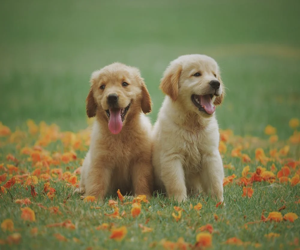

['two dogs are sitting in a field with flowers']

In [ ]:
from PIL import Image
from IPython.display import display

# Load the image
image_path = '2 dogs.webp'
image = Image.open(image_path)

# Resize the image
resized_image = image.resize((300, 250))

# Display the resized image
display(resized_image)

print('')
predict_step(['2 dogs.webp'])

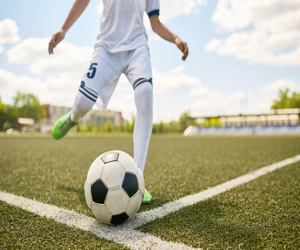

['a soccer player kicking a soccer ball on a field']

In [ ]:
# Load the image
image_path = 'football.png'
image = Image.open(image_path)

# Resize the image
resized_image = image.resize((300, 250))

# Display the resized image
display(resized_image)

print('')
predict_step(['football.png'])

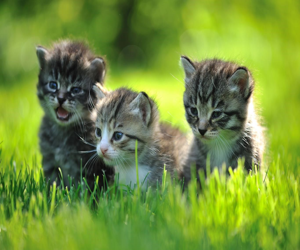

['a pair of kittens sitting on top of a green grass covered field']

In [ ]:
# Load the image
image_path = '3 kittens.png'
image = Image.open(image_path)

# Resize the image
resized_image = image.resize((300, 250))

# Display the resized image
display(resized_image)

print('')
predict_step(['3 kittens.png'])

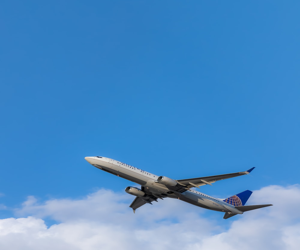

['a large jetliner flying through a blue sky']

In [ ]:
# Load the image
image_path = 'aeroplane.jpeg'
image = Image.open(image_path)

# Resize the image
resized_image = image.resize((300, 250))

# Display the resized image
display(resized_image)

print('')
predict_step(['aeroplane.jpeg'])

## BLEU SCORE

In [ ]:
import nltk

# Sample ground truth captions
ground_truth_captions = [
    ["two dogs sitting in a field of flowers", "a soccer player kicking a soccer ball on a field","Three kittens sitting on top of a green grass covered field","a large jetliner flying through a blue sky"],
    # Add more ground truth captions for other images
]

# replace with your actual generated captions
generated_captions = [
    "two dogs are sitting in a field with flowers",
    "a soccer player kicking a soccer ball on a field",
    "a pair of kittens sitting on top of a green grass covered field",
    "a large aircraft flying through a blue sky"
    # Add more generated captions for other images
]

# Calculate BLEU scores
bleu_scores = []
for i in range(len(ground_truth_captions)):
    reference = ground_truth_captions[i]
    hypothesis = generated_captions[i]
    bleu_score = nltk.translate.bleu_score.sentence_bleu(reference, hypothesis)
    bleu_scores.append(bleu_score)

# Calculate average BLEU score
average_bleu_score = sum(bleu_scores) / len(bleu_scores)

print(f"Average BLEU Score: {average_bleu_score:.2f}")


Average BLEU Score: 0.83
